In [ ]:
key = '' #google api key
import requests
import json, os
import urllib.request
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
import shapely
import pickle
import random
import numpy as np

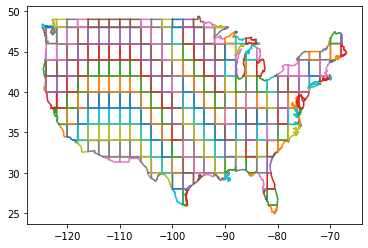

In [2]:
usaPolyGrid = pickle.load(open("usaPolyGrid.pkl",'rb'))
for i in usaPolyGrid.values():
    plt.plot(i[:,1],i[:,0])

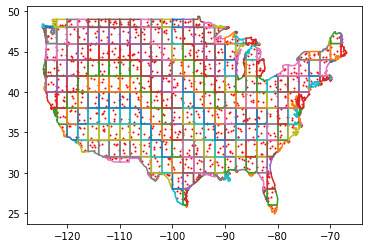

In [3]:
# %matplotlib auto
# %matplotlib inline
for grid,coor in usaPolyGrid.items():
    poly = Polygon(np.flip(coor))
    x,y = poly.exterior.xy
    plt.plot(x,y)
    minx, miny, maxx, maxy = poly.bounds
    count = 0
    while count<5:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if poly.contains(pnt):
            plt.scatter([pnt.x],[pnt.y],c='r',s=1)
            count += 1

In [4]:
base = 'https://maps.googleapis.com/maps/api/streetview'
ext = '?size=600x300&location={}&fov=100&heading={}&radius={}&pitch=10&key={}'
for grid,coor in usaPolyGrid.items():        
    poly = Polygon(np.flip(coor))
    minx, miny, maxx, maxy = poly.bounds
    count = 0
    trials = 0
    locList = []
    if str(grid) not in os.listdir("data"):
        saveFolder = 'data/{}'.format(grid)
        os.mkdir(saveFolder)
        print("Searching new grid {}".format(grid))
        while count<5 and trials<5:
            pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
            location = str(pnt.y)+','+str(pnt.x)
            if (poly.contains(pnt)) and (location not in locList):
                metaUrl = base + '/metadata' + ext.format(location, 0, 10000, key)
                r = requests.get(metaUrl).json()
                trials += 1
                print("Trial: {}, count: {}".format(trials,count))
                if r['status']=='OK' and poly.contains(Point(r['location']['lng'],r['location']['lat'])):
                    location = str(r['location']['lat'])+','+str(r['location']['lng'])
                    print("Valid location found: {}".format(location))
                    locList.append(location)
                    saveFile = saveFolder + "/{}".format(location)
                    if os.path.exists(saveFile)==False:
                        os.mkdir(saveFile)

                    for heading in [0,90,180]:
                        imgUrl = base + ext.format(location, heading, 10000, key)
                        urllib.request.urlretrieve(imgUrl,saveFile+'/{}_{}.jpg'.format(heading,r['date']))
                    count += 1
                    trials = 0
                else:
                    print("Failed trial")
        i = input("Completed grid {}:".format(grid))
        if i=='0':
            break
    else:
        print("Grid {} already has data".format(grid))

Grid 0 already has data
Grid 1 already has data
Searching new grid 2
Trial: 1, count: 0
Valid location found: 43.0093044,-124.4149885
Trial: 1, count: 1
Valid location found: 42.3467092,-124.1609251
Trial: 1, count: 2
Valid location found: 42.34373739999999,-124.1654916
Trial: 1, count: 3
Valid location found: 43.31750363509703,-124.1587420043495
Trial: 1, count: 4
Valid location found: 42.67587286891516,-124.0887578852396
Completed grid 2:0


In [2]:
location = '46.514382,10.013988'
heading = 360
radius = 10000
base = 'https://maps.googleapis.com/maps/api/streetview'
ext = '?size=600x300&location={}&fov=100&heading={}&radius={}&pitch=10&key={}'.format(location,
                                                                                      heading,
                                                                                      radius,
                                                                                      key)
imgUrl = base + ext
metaUrl = base + '/metadata' + ext

In [4]:
location = '46.514382,10.013988'
heading = 360
radius = 10000
base = 'https://maps.googleapis.com/maps/api/streetview'

if os.path.exists(location)==False:
    os.mkdir(location)
for head in [0,90,180]:
    ext = '?size=600x300&location={}&fov=100&heading={}&radius={}&pitch=10&key={}'.format(location,
                                                                                          head,
                                                                                          radius,
                                                                                          key)
    imgUrl = base + ext
    metaUrl = base + '/metadata' + ext
    r = requests.get(metaUrl).json()
    if r['status']=='OK':
        urllib.request.urlretrieve(imgUrl,location+'/'+'{}.jpg'.format(head))

In [3]:
r = requests.get(metaUrl).json()

In [5]:
r

{'copyright': "© Max Dell'Oro",
 'date': '2017-06',
 'location': {'lat': 46.5094357, 'lng': 10.0646479},
 'pano_id': 'CAoSLEFGMVFpcE1GbkVMVTRSbW4tdmlMZU9PMWZwOE50OHc2bEVSU09KTnJaOEdn',
 'status': 'OK'}

In [66]:
urllib.request.urlretrieve(imgUrl,'test3.jpg')